# Predicting diabetes

---

Imported Libraries

In [ ]:
# Data processing
# ==================================================================================
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pickle import dump
import json

# Charts
# ==================================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and modeling
# ==================================================================================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest

# Warnings Configuration
# ==================================================================================
import warnings

def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn # ignore annoying warning (from sklearn and seaborn)

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
'''NOTE: This affects only the display and not the underlying data, which remains unchanged.'''

'NOTE: This affects only the display and not the underlying data, which remains unchanged.'

---

## Step 1: Problem statement and data collection

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
df.head(3)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1


**Description and types of Data**

- `Pregnancies` --> Number of pregnancies of the patient <i>(Numerical)</i>

- `Glucose` --> Plasma glucose concentration 2 hours after an oral glucose tolerance test <i>(Numerical)</i>
- `BloodPressure` --> Diastolic blood pressure (measured in mm Hg) <i>(Numerical)</i>
- `SkinThickness`--> Triceps skin fold thickness (measured in mm) <i>(Numerical)</i>
- `Insulin` --> 2-hour serum insulin (measured in mu U/ml) <i>(Numerical)</i>
- `BMI` --> Body mass index <i>(Numerical)</i>
- `DiabetesPedigreeFunction` --> Diabetes Pedigree Function <i>(Numerical)</i>
- `Age` --> Age of patient <i>(Numerical)</i>
- `Outcome` --> Class variable (0 or 1), being 0 negative in diabetes and 1 positive <i>(Numerical)</i>

---

# Step 2: Exploration and data cleaning
- ### 2.1 Summarize DF

In [3]:
# Obtain dimensions

rows, columns = df.shape

print(f"The dimensions of this dataset are: {rows} Rows and {columns} Columns")

The dimensions of this dataset are: 768 Rows and 9 Columns


In [4]:
# Obtain information about data types and non-null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Check null values

null_var = df.isnull().sum().loc[lambda x: x > 0] # Number of nulls in each variable.

num_of_null_var = len(null_var) # Number of variables with almost 1 null.

print(f"{null_var}\nAnd the number of null variables are {num_of_null_var}")

Series([], dtype: int64)
And the number of null variables are 0


----------<b>Conclusions</b>----------

- There are a total of 768 rows (in this case rentals) and 9 columns, among which we find the target or class to predict, `Outcome                   `.

- The variables always have a value.
- The data has 2 (float64) numerical characteristics and 7 (int64) categorical characteristics.

---

- ### 2.2 Eliminate duplicates

In [6]:
# Obtain the number of duplicate values in our dataset

num_duplicate_values = df.duplicated().sum()

print(f"The number of duplicate values in the dataset is {num_duplicate_values}")

The number of duplicate values in the dataset is 0


In [7]:
# Dataset copy

filt_df = df.copy()


# Eliminate the duplicate

if num_duplicate_values:

    filt_df = filt_df.drop_duplicates()

print(filt_df.shape)

filt_df.head(3)

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1


In [8]:
# Obtain the number of duplicate values in our ¡FILTERED! dataset

num_duplicate_values = filt_df.duplicated().sum()

print(f"The number of duplicate values in the dataset is {num_duplicate_values}")

The number of duplicate values in the dataset is 0


---

## Step 3: Analysis of univariate variables

- ### 3.1 Analysis of categorical variables

In [9]:
categorical_var = []

for column in filt_df: 

    if filt_df[column].dtype == 'object':

        categorical_var.append(column)


print(f"Categorical Variables are:\n{categorical_var}\n\nTotal = {len(categorical_var)}")

Categorical Variables are:
[]

Total = 0


---

- ### 3.2 Analysis of numerical variables

In [10]:
numerical_var_int = []
numerical_var_float = []

for column in filt_df: 

    if (filt_df[column].dtype == 'int64') :

        numerical_var_int.append(column)

    elif (filt_df[column].dtype == 'float64'):

        numerical_var_float.append(column)

print('============================================')
print(f"Numerical (int) Variables are:\n\n{numerical_var_int}\n\nTotal = {len(numerical_var_int)}")
print('============================================')
print(f"Numerical (float64) Variables are:\n\n{numerical_var_float}\n\nTotal = {len(numerical_var_float)}")
print('============================================')

Numerical (int) Variables are:

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'Age', 'Outcome']

Total = 7
Numerical (float64) Variables are:

['BMI', 'DiabetesPedigreeFunction']

Total = 2


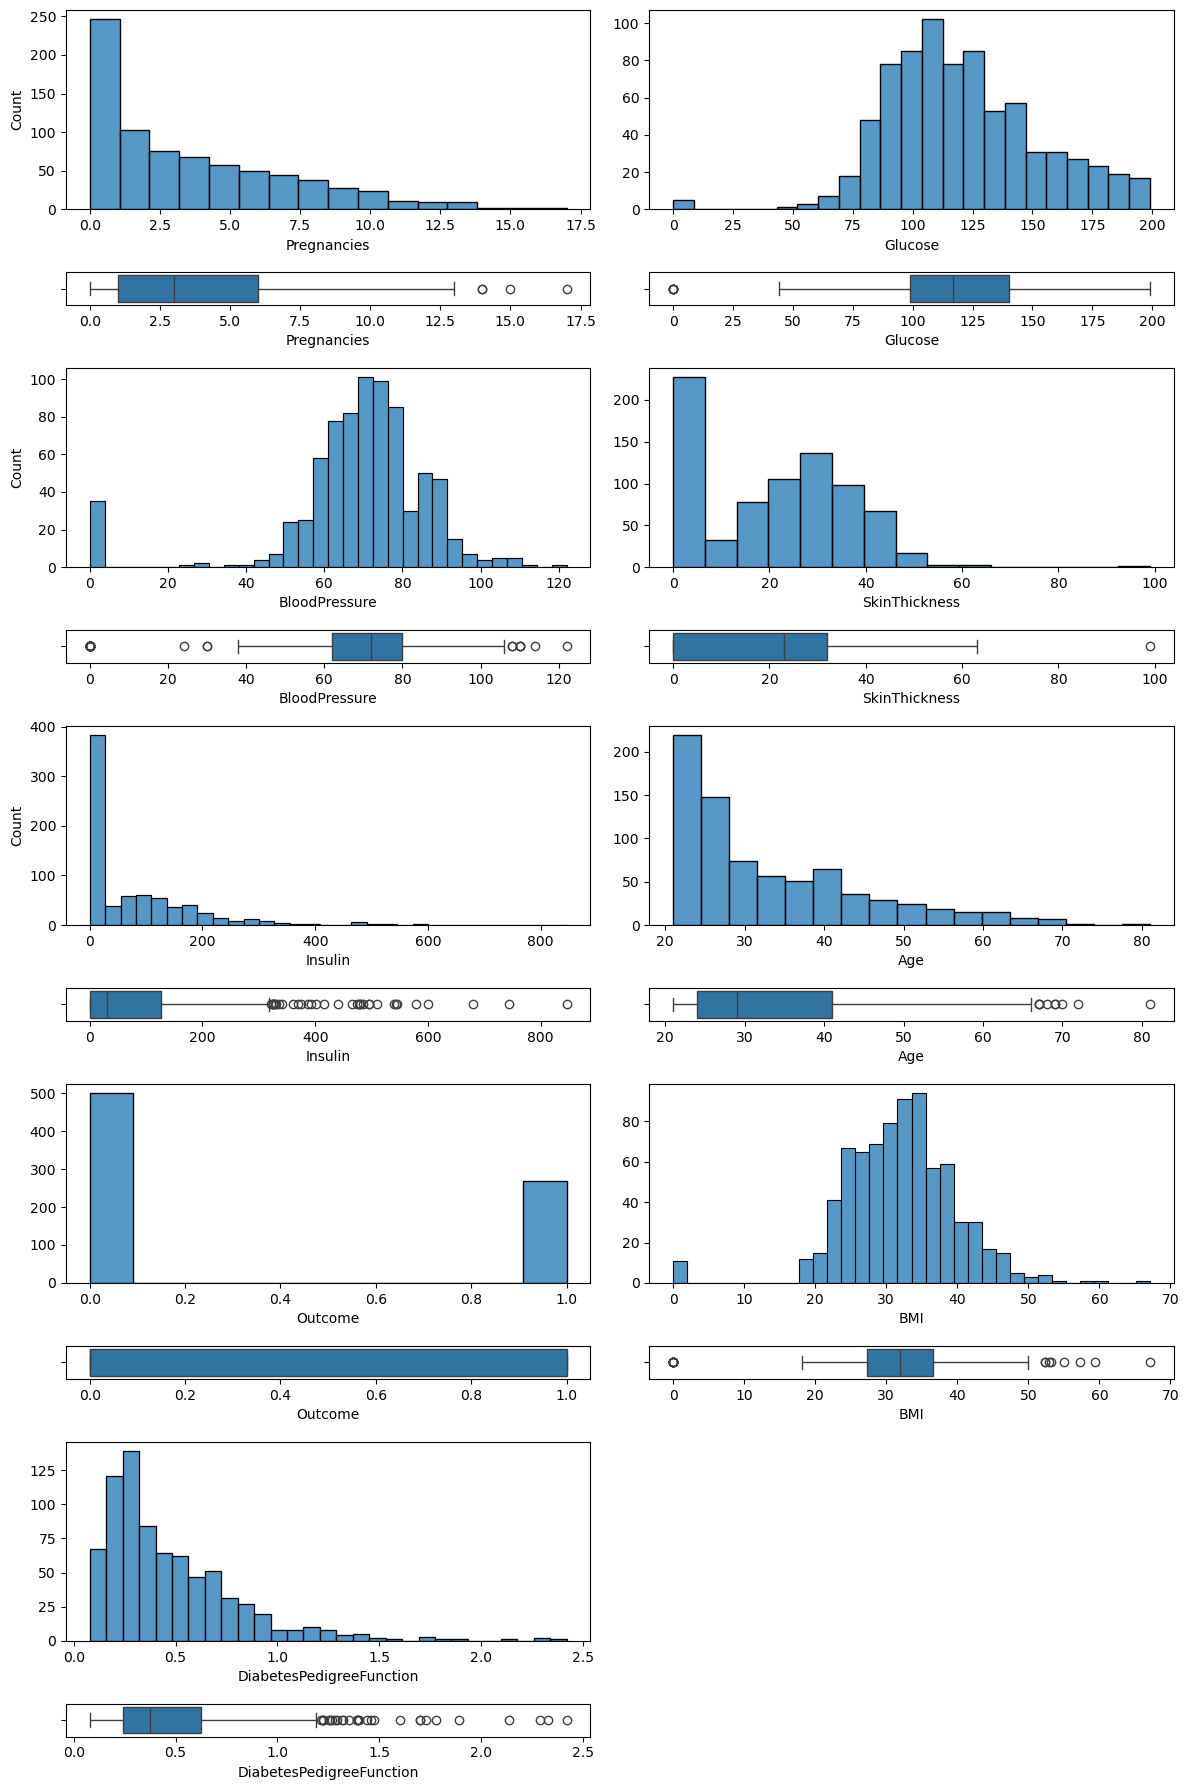

In [11]:
fig, axis = plt.subplots(10, 2,
                            figsize = (12, 18),
                                gridspec_kw={'height_ratios': [6, 1, 6, 1, 6, 1, 6, 1, 6, 1]})


# ==========================Variable Pregnancies==========================
sns.histplot(ax = axis[0, 0],
                data = filt_df, 
                    x = "Pregnancies")

sns.boxplot(ax = axis[1, 0],
                data = filt_df,
                     x = "Pregnancies")


# ==========================Variable Glucose==========================
sns.histplot(ax = axis[0, 1],
                data = filt_df, 
                     x = "Glucose").set(ylabel = None)

sns.boxplot(ax = axis[1, 1],
                data = filt_df, 
                     x = "Glucose")


# ==========================Variable BloodPressure======================== 
sns.histplot(ax = axis[2, 0],
                data = filt_df, 
                    x = "BloodPressure")

sns.boxplot(ax = axis[3, 0],
                data = filt_df,
                    x = "BloodPressure")


# ==========================Variable SkinThickness===========================
sns.histplot(ax = axis[2, 1],
                data = filt_df, 
                    x = "SkinThickness").set(ylabel = None)

sns.boxplot(ax = axis[3, 1],
                data = filt_df,
                    x = "SkinThickness")


# ==========================Variable Insulin======================== 
sns.histplot(ax = axis[4, 0],
                data = filt_df, 
                    x = "Insulin")

sns.boxplot(ax = axis[5, 0],
                data = filt_df,
                    x = "Insulin")


# ==========================Variable Age===========================
sns.histplot(ax = axis[4, 1],
                data = filt_df, 
                    x = "Age").set(ylabel = None)

sns.boxplot(ax = axis[5, 1],
                data = filt_df,
                    x = "Age")


# ==========================Variable Outcome===========================
sns.histplot(ax = axis[6, 0],
                data = filt_df, 
                    x = "Outcome").set(ylabel = None)

sns.boxplot(ax = axis[7, 0],
                data = filt_df,
                    x = "Outcome")


# ==========================Variable BMI===========================
sns.histplot(ax = axis[6, 1],
                data = filt_df, 
                    x = "BMI").set(ylabel = None)

sns.boxplot(ax = axis[7, 1],
                data = filt_df,
                    x = "BMI")


# ==========================Variable DiabetesPedigreeFunction===========================
sns.histplot(ax = axis[8, 0],
                data = filt_df, 
                    x = "DiabetesPedigreeFunction").set(ylabel = None)

sns.boxplot(ax = axis[9, 0],
                data = filt_df,
                    x = "DiabetesPedigreeFunction")

fig.delaxes(ax = axis[8,1])
fig.delaxes(ax = axis[9,1])

plt.tight_layout()
plt.show()

----------**Breakdown**----------

Pregnancies:

- The histogram is right-skewed, indicating that most women have a low number of pregnancies, with fewer having a higher count. The boxplot suggests some outliers in the higher range.

Glucose: 
- The distribution is somewhat bell-shaped, with a concentration around 100–150. The boxplot indicates a few outliers at the higher end.

Blood Pressure:
- The histogram shows a roughly normal distribution centered around 70–80. However, there are outliers at both the lower and higher extremes.

Skin Thickness: 
- The distribution is skewed with a significant portion of zero values, which could indicate missing or unmeasured data. There are several outliers as shown in the boxplot.

Insulin:
- The histogram reveals a highly skewed distribution, with many observations having low values and a long tail extending to higher values. There are numerous outliers as indicated in the boxplot.

Age:
- The distribution of age is right-skewed, with most people between 20 and 40 years old. The boxplot shows several outliers in the older age groups.

Outcome:
- This seems to represent a binary variable, indicating either a non-diabetic (0) or diabetic (1) status, with more people having an outcome of 0.

BMI: 
- The BMI distribution appears roughly normal, centered around 30, with some outliers on the higher end.

Diabetes Pedigree Function:
- This metric shows a right-skewed distribution with a long tail, and several outliers are present according to the boxplot.


---

## Step 4: Analysis of multivariate variables

- ### 4.1 Numerical-numerical analysis

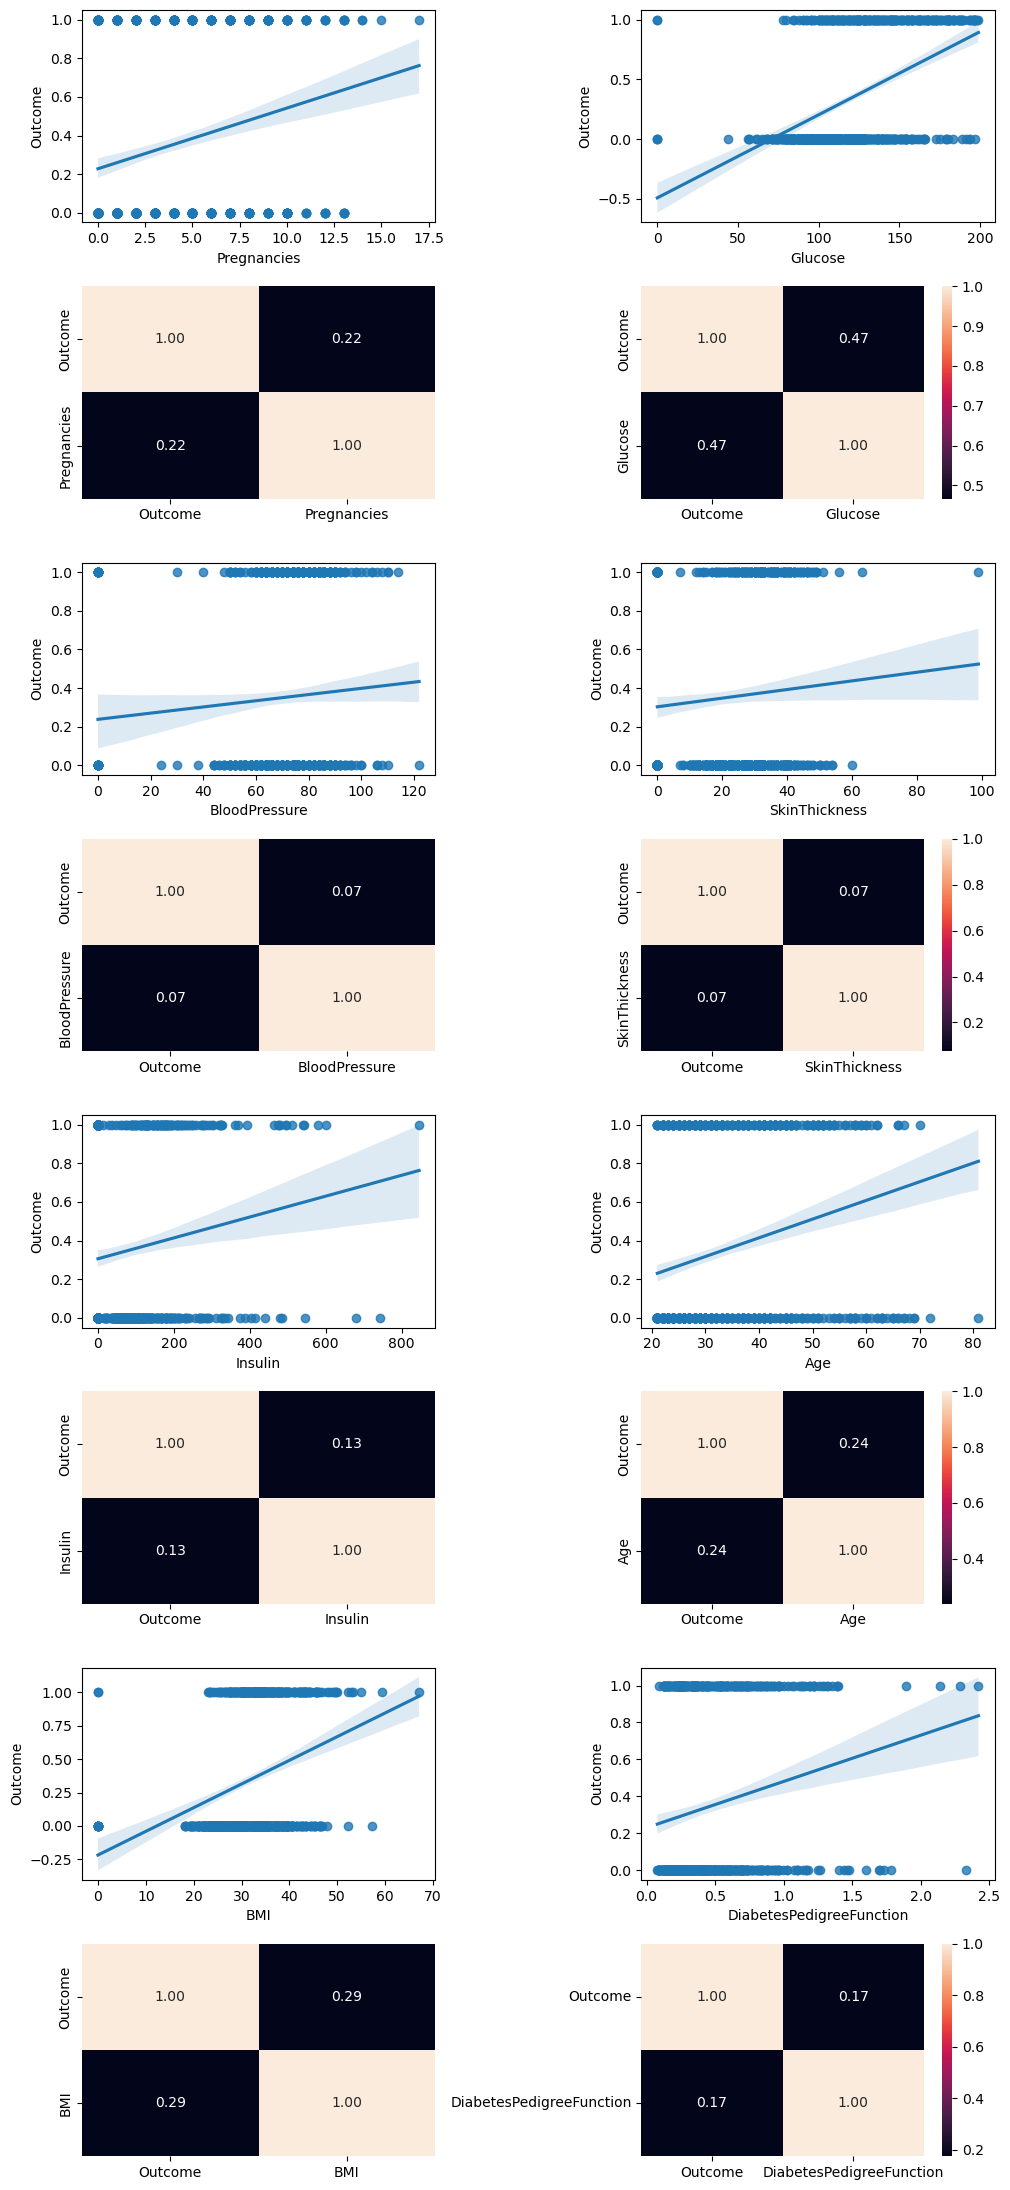

In [12]:
fig, axis = plt.subplots(8, 2, figsize = (10, 22))


# Analysis of variable 'Pregnancies' respect 'Outcome'
sns.regplot(ax = axis[0,0],
                data = filt_df,
                    x = "Pregnancies", 
                         y = "Outcome")

sns.heatmap(filt_df[["Outcome", "Pregnancies"]].corr(),
                annot = True, 
                    fmt = ".2f", 
                        ax = axis[1, 0], 
                            cbar = False)


# Analysis of variable 'Glucose' respect 'Outcome'
sns.regplot(ax = axis[0,1],
                data = filt_df,
                    x = "Glucose", 
                         y = "Outcome")

sns.heatmap(filt_df[["Outcome", "Glucose"]].corr(), 
                annot = True, 
                    fmt = ".2f",
                        ax = axis[1, 1])


# Analysis of variable 'BloodPressure' respect 'Outcome'
sns.regplot(ax = axis[2,0],
                data = filt_df, 
                    x = "BloodPressure", 
                        y = "Outcome")

sns.heatmap(filt_df[["Outcome", "BloodPressure"]].corr(),
                annot = True, 
                    fmt = ".2f", 
                        ax = axis[3,0],
                        cbar = False)


# Analysis of variable 'SkinThickness' respect 'Outcome'
sns.regplot(ax = axis[2,1],
                data = filt_df,
                    x = "SkinThickness", 
                         y = "Outcome")

sns.heatmap(filt_df[["Outcome", "SkinThickness"]].corr(),
                annot = True, 
                    fmt = ".2f", 
                        ax = axis[3, 1])


# Analysis of variable 'Insulin' respect 'Outcome'
sns.regplot(ax = axis[4, 0],
                data = filt_df,
                    x = "Insulin", 
                         y = "Outcome")

sns.heatmap(filt_df[["Outcome", "Insulin"]].corr(), 
                annot = True, 
                    fmt = ".2f",
                        ax = axis[5, 0],
                        cbar = False)


# Analysis of variable 'Age' respect 'Outcome'
sns.regplot(ax = axis[4,1],
                data = filt_df, 
                    x = "Age", 
                        y = "Outcome")

sns.heatmap(filt_df[["Outcome", "Age"]].corr(),
                annot = True, 
                    fmt = ".2f", 
                        ax = axis[5,1])


# Analysis of variable 'BMI' respect 'Outcome'
sns.regplot(ax = axis[6,0],
                data = filt_df,
                    x = "BMI", 
                         y = "Outcome")

sns.heatmap(filt_df[["Outcome", "BMI"]].corr(),
                annot = True, 
                    fmt = ".2f", 
                        ax = axis[7, 0], 
                            cbar = False)


# Analysis of variable 'DiabetesPedigreeFunction' respect 'Outcome'
sns.regplot(ax = axis[6,1],
                data = filt_df,
                    x = "DiabetesPedigreeFunction", 
                         y = "Outcome")

sns.heatmap(filt_df[["Outcome", "DiabetesPedigreeFunction"]].corr(), 
                annot = True, 
                    fmt = ".2f",
                        ax = axis[7, 1])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

----------**Conclusions**----------

- Glucose and BMI have the strongest correlations with the outcome, suggesting they may be important predictors.

- Pregnancies, Age, and DiabetesPedigreeFunction show weak positive correlations with the outcome.

- BloodPressure and SkinThickness show very weak relationships with the outcome, indicating they may have limited predictive value for this dataset.

---

- ### 4.2 Correlation matrix

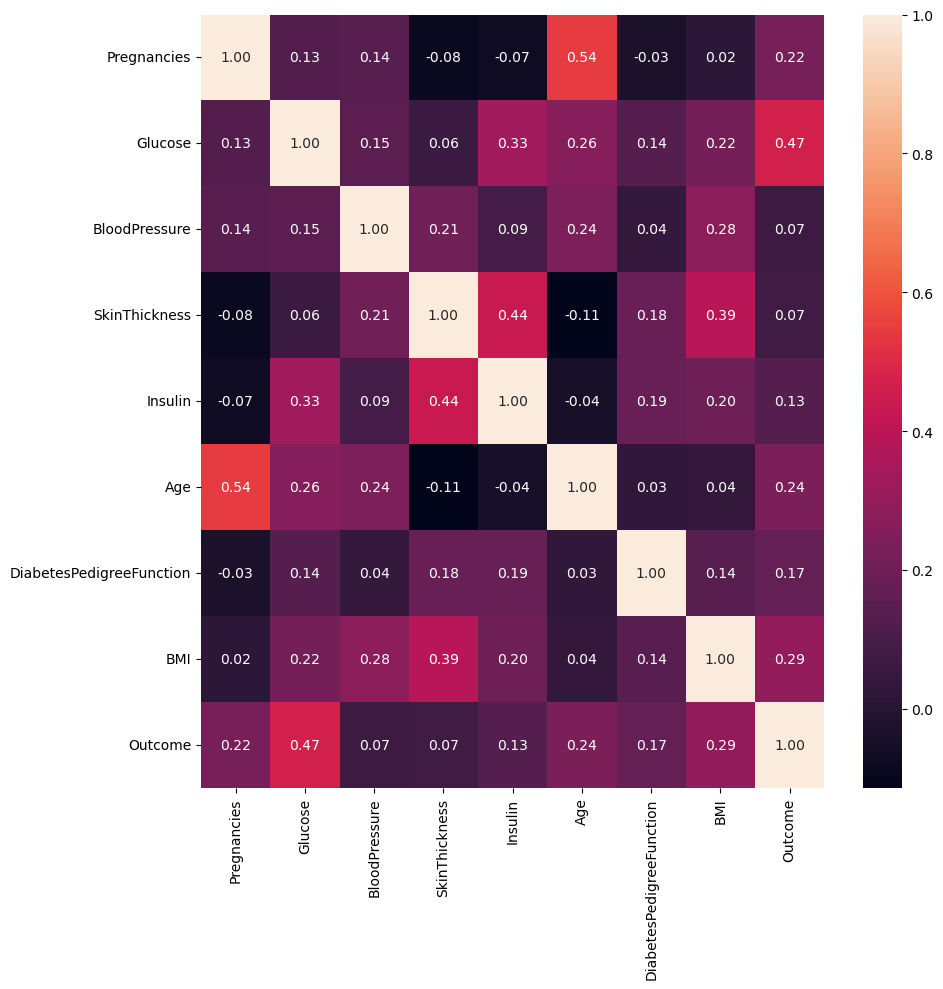

In [13]:
fig, axes = plt.subplots(figsize=(10, 10))


sns.heatmap(filt_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                    'Insulin', 'Age', 'DiabetesPedigreeFunction',
                     'BMI', "Outcome"]].corr(),
                            annot = True,
                                 fmt = ".2f")


plt.tight_layout()


plt.show()

---

## Step 5: Featuure engineering

- 5.1 Outliers analysis

In [14]:
total_stats = filt_df.describe()

total_stats

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


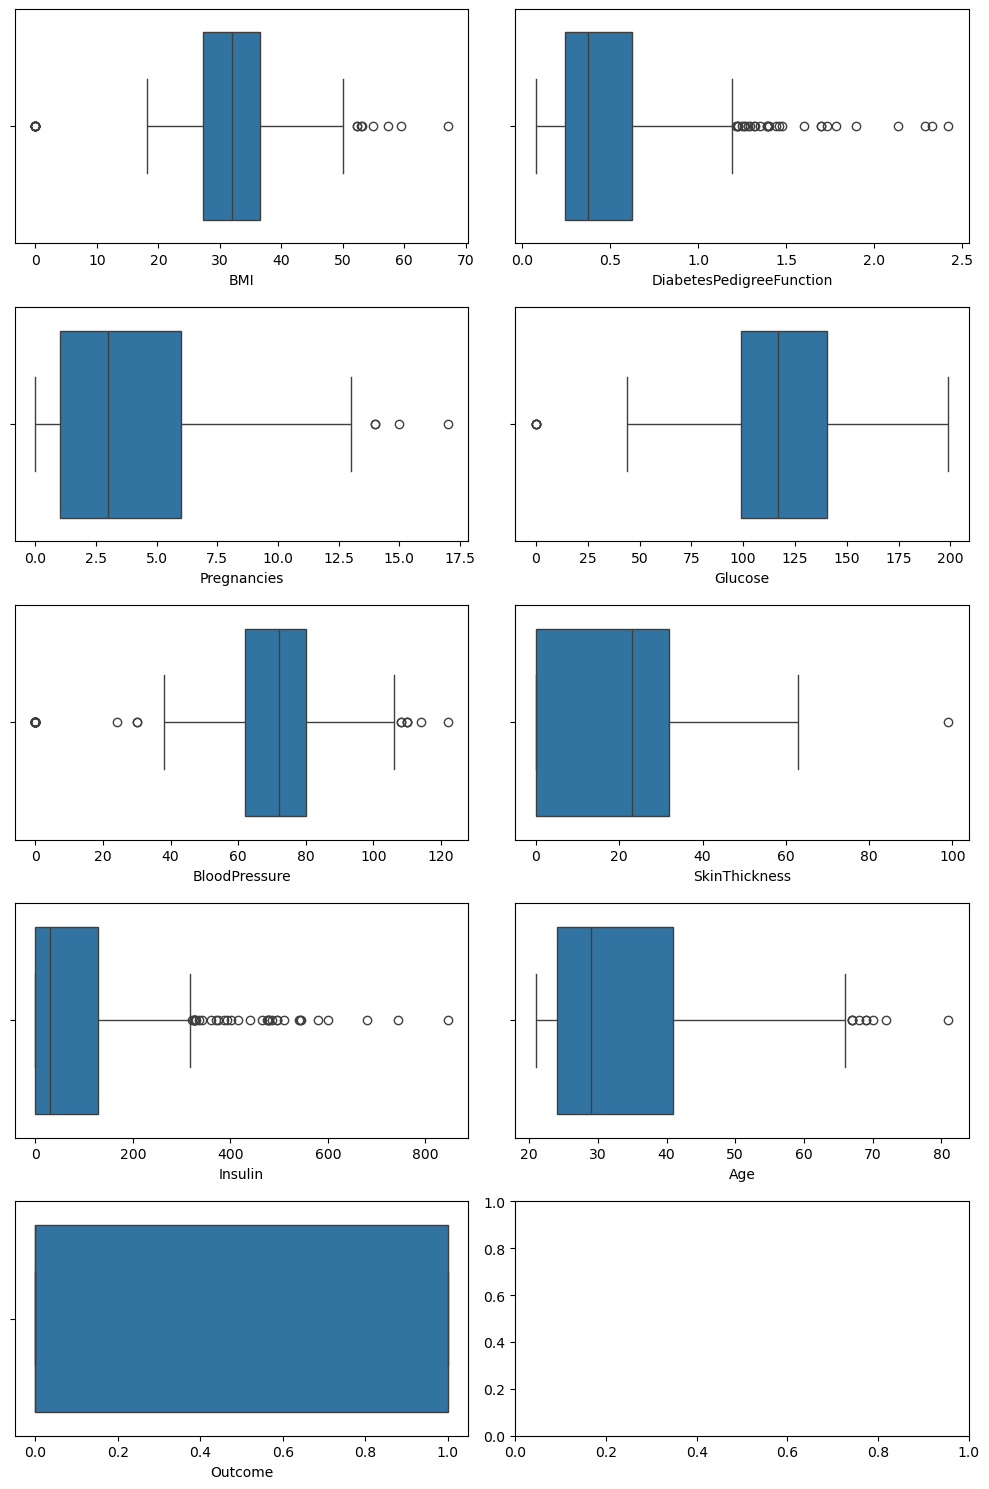

In [15]:
numerical_var = numerical_var_float + numerical_var_int

fig, ax = plt.subplots(5,2, figsize=(10, 15))

row, col = 0, 0
for each in numerical_var:
    sns.boxplot(ax = ax[row,col], data = filt_df, x=each)
    col += 1
    if col == 2: 
        row += 1 
        col = 0
 

plt.tight_layout()
plt.show()

---

- ### 5.2 Upper and lower limits of outliers variables --> <i>JSON saving</i>

In [16]:
# Save Outliers

def def_outliers(total_stats, variable, json_file):

    individual_stats = total_stats[variable] # Save the stats for IQR

    iqr = individual_stats["75%"] - individual_stats["25%"]
    upper_limit = individual_stats["75%"] + (2 * iqr) 
    lower_limit = individual_stats["25%"] - (2 * iqr)

    if (lower_limit < 0): lower_limit = 0

    print(f"\nThe upper_limit of Variable {variable} is {round(upper_limit, 3)}, the lower_limit is {round(lower_limit, 3)} and the IQR is {round(iqr, 3)}")
    print('                      ==========================================                  ')
    with open(json_file, "w") as f:
        json.dump({
            "upper_limit": upper_limit,
            "lower_limit": lower_limit
        }, f)

In [17]:
for variable in numerical_var:
        def_outliers(total_stats, variable, f"../data/interim/outliers_{variable}.json")


The upper_limit of Variable BMI is 55.2, the lower_limit is 8.7 and the IQR is 9.3

The upper_limit of Variable DiabetesPedigreeFunction is 1.391, the lower_limit is 0 and the IQR is 0.382

The upper_limit of Variable Pregnancies is 16.0, the lower_limit is 0 and the IQR is 5.0

The upper_limit of Variable Glucose is 222.75, the lower_limit is 16.5 and the IQR is 41.25

The upper_limit of Variable BloodPressure is 116.0, the lower_limit is 26.0 and the IQR is 18.0

The upper_limit of Variable SkinThickness is 96.0, the lower_limit is 0 and the IQR is 32.0

The upper_limit of Variable Insulin is 381.75, the lower_limit is 0 and the IQR is 127.25

The upper_limit of Variable Age is 75.0, the lower_limit is 0 and the IQR is 17.0

The upper_limit of Variable Outcome is 3.0, the lower_limit is 0 and the IQR is 1.0


---

- ### 5.3 Copy 2 DataFrames: with and withou outliers

In [18]:
df_with_outliers = filt_df.copy()
df_without_outliers = filt_df.copy()

'''Todos los Outliers modificados los guardaremos actualizaremos en df_sin_outliers'''

'Todos los Outliers modificados los guardaremos actualizaremos en df_sin_outliers'

In [19]:
# Open Outliers JSON

def open_outliers(dataset_without_outliers, variable, json_path):

    with open(json_path, "r") as f:
        outliers = json.load(f)

    upper_limit_ = outliers["upper_limit"]

    lower_limit_ = outliers["lower_limit"]

    dataset_without_outliers[variable] = dataset_without_outliers[variable].apply(
        lambda x: upper_limit_ if (x > upper_limit_) else (lower_limit_ if (x < lower_limit_) else x)
        )

In [20]:
for variable in numerical_var:
    open_outliers(df_without_outliers, variable, f"../data/interim/outliers_{variable}.json")

---

- ### 5.4 Missing value analysis

In [21]:
filt_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

---

- ### 5.5 Feature Scaling
    - #### 5.5.1 Train test

In [22]:
def train_test(target_var, df, test_size=0.2, random_state=42):
    
    X = df.drop(columns = target_var)
    y = df[target_var]

    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                         test_size = test_size,
                                                           random_state = random_state)
    
    return X_train, X_test, y_train, y_test

In [23]:
# Split original dataframe 

# With Outliers
X_train_with_outliers, X_test_with_outliers, y_train, y_test = train_test('Outcome', df_with_outliers)

# Without Outliers
X_train_without_outliers, X_test_without_outliers, _, _ = train_test('Outcome', df_without_outliers)

> NOTE: Only predictor variables should be scaled, never the target.

---

- ### 5.5.2 Normalization

In [24]:
def norm(X_train,
          X_test,
            type_df: str): # with OR without outliers

    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train_norm = scaler.transform(X_train)
    X_train_norm = pd.DataFrame(X_train_norm, 
                                index = X_train.index,
                                  columns = X_train.columns)

    X_test_norm = scaler.transform(X_test)
    X_test_norm = pd.DataFrame(X_test_norm,
                                index = X_test.index,
                                  columns = X_test.columns)

    dump(scaler, open(f'../data/interim/normalized_{type_df}.sav', 'wb'))

    return X_train_norm, X_test_norm

In [25]:
# With Outliers
X_train_with_outliers_norm, X_test_with_outliers_norm = norm(X_train_with_outliers,
                                                              X_test_with_outliers,
                                                                'with_outliers')


# Without Outliers
X_train_without_outliers_norm, X_test_without_outliers_norm = norm(X_train_without_outliers,
                                                                    X_test_without_outliers,
                                                                      'without_outliers')

---

- #### 5.5.3 Min-Max Scaling

In [26]:
def minmax(X_train,
            X_test,
              type_df: str): # with OR without outliers

    scaler = MinMaxScaler()
    scaler.fit(X_train)
    
    X_train_minmax = scaler.transform(X_train)
    X_train_minmax = pd.DataFrame(X_train_minmax,
                                   index = X_train.index, 
                                    columns=X_train.columns)

    X_test_minmax = scaler.transform(X_test)
    X_test_minmax = pd.DataFrame(X_test_minmax,
                                  index = X_test.index,
                                    columns=X_test.columns)
    
    dump(scaler, open(f'../data/interim/minmax_{type_df}.sav', 'wb'))

    return X_train_minmax, X_test_minmax

In [27]:
# With Outliers
X_train_with_outliers_minmax, X_test_with_outliers_minmax = minmax(X_train_with_outliers,
                                                                    X_test_with_outliers,
                                                                      'with_outliers')

# Without Outliers
X_train_without_outliers_minmax, X_test_without_outliers_minmax = minmax(X_train_without_outliers,
                                                                          X_test_without_outliers,
                                                                            'without_outliers')

> NOTE: In this step we must make sure that all our variables are numeric, and, if not, as we have seen in the steps at the beginning, we should transform them.

---

## Step 6: Feature selection

In [28]:
def kselection(X_train,
                X_test,
                  y_train,
                    k, # This function selects the 'k' best feat. from our dataset
                      type_df: str): # with OR without outliers

    selection_model = SelectKBest(f_classif, k=k)
    selection_model.fit(X_train, y_train)

    cols = selection_model.get_support()

    X_train_sel = pd.DataFrame(selection_model.transform(X_train),
                                columns=X_train.columns.values[cols]) 
    X_test_sel = pd.DataFrame(selection_model.transform(X_test),
                               columns=X_test.columns.values[cols])

    dump(selection_model, open(f'../data/interim/selection_model_{type_df}.sav', 'wb'))

    return X_train_sel, X_test_sel   

In [29]:
# With Outliers
X_train_with_outliers_sel, X_test_with_outliers_sel = kselection(X_train_with_outliers,
                                                                  X_test_with_outliers,
                                                                    y_train, 8,
                                                                      'with_outliers')

# Without Outliers
X_train_without_outliers_sel, X_test_without_outliers_sel = kselection(X_train_without_outliers,
                                                                        X_test_without_outliers,
                                                                          y_train, 8,
                                                                            'without_outliers')

- ### 6.1 Applying the filter to the normalized and min max scaled data frames

In [30]:
#=========================normalized========================

# X_train normalized----------------
    # With Outliers
X_train_with_outliers_norm_sel = X_train_with_outliers_norm[X_train_with_outliers_sel.columns]
    # Without Outliers
X_train_without_outliers_norm_sel = X_train_without_outliers_norm[X_train_with_outliers_sel.columns]

# X_test normalized-----------------
    # With Outliers
X_test_with_outliers_norm_sel = X_test_with_outliers_norm[X_test_with_outliers_sel.columns]
    # Without Outliers
X_test_without_outliers_norm_sel = X_test_without_outliers_norm[X_test_with_outliers_sel.columns]

#==========================min-max==========================

# X_train min-max-------------------
    # With Outliers
X_train_with_outliers_minmax_sel = X_train_with_outliers_minmax[X_train_with_outliers_sel.columns]
    # Without Outliers
X_train_without_outliers_minmax_sel = X_train_without_outliers_minmax[X_train_without_outliers_sel.columns]

# X_test min-max--------------------
    # With Outliers
X_test_with_outliers_minmax_sel = X_test_with_outliers_minmax[X_test_with_outliers_sel.columns]
    # Without Outliers
X_test_without_outliers_minmax_sel = X_test_without_outliers_minmax[X_test_without_outliers_sel.columns]

- ### 6.2 Saving the CSV files

In [31]:
# Train data frames
X_train_with_outliers_sel.to_csv('../data/processed/X_train_with_outliers_sel.csv', index=False)
X_train_without_outliers_sel.to_csv('../data/processed/X_train_without_outliers_sel.csv', index=False)
X_train_with_outliers_norm_sel.to_csv('../data/processed/X_train_with_outliers_norm_sel.csv', index=False)
X_train_without_outliers_norm_sel.to_csv('../data/processed/X_train_without_outliers_norm_sel.csv', index=False)
X_train_with_outliers_minmax_sel.to_csv('../data/processed/X_train_with_outliers_minmax_sel.csv', index=False)
X_train_without_outliers_minmax_sel.to_csv('../data/processed/X_train_without_outliers_minmax_sel.csv', index=False)
y_train.to_csv('../data/processed/y_train.csv', index=False)

# Test data frames
X_test_with_outliers_sel.to_csv('../data/processed/X_test_with_outliers_sel.csv', index=False)
X_test_without_outliers_sel.to_csv('../data/processed/X_test_without_outliers_sel.csv', index=False)
X_test_with_outliers_norm_sel.to_csv('../data/processed/X_test_with_outliers_norm_sel.csv', index=False)
X_test_without_outliers_norm_sel.to_csv('../data/processed/X_test_without_outliers_norm_sel.csv', index=False)
X_test_with_outliers_minmax_sel.to_csv('../data/processed/X_test_with_outliers_minmax_sel.csv', index=False)
X_test_without_outliers_minmax_sel.to_csv('../data/processed/X_test_without_outliers_minmax_sel.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)